## The aim of model is to predict whether customer purchase insuarance  or not

## load library

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## load dataset

In [2]:
insurance = pd.read_csv(r"C:\Users\Administrator\Desktop\TRAIN.csv")

In [3]:
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,Male,50,1,41,0,1-2 Year,Yes,35915,124,240,0
1,239788,Female,48,1,28,0,1-2 Year,Yes,26873,124,274,0
2,348272,Female,34,1,41,0,1-2 Year,Yes,2630,156,138,1
3,73940,Female,43,1,28,0,1-2 Year,Yes,46877,124,223,0
4,292871,Male,29,1,28,1,< 1 Year,No,38009,152,106,0


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    304887 non-null  int64 
 1   Gender                304887 non-null  object
 2   Age                   304887 non-null  int64 
 3   Driving_License       304887 non-null  int64 
 4   Region_Code           304887 non-null  int64 
 5   Previously_Insured    304887 non-null  int64 
 6   Vehicle_Age           304887 non-null  object
 7   Vehicle_Damage        304887 non-null  object
 8   Annual_Premium        304887 non-null  int64 
 9   Policy_Sales_Channel  304887 non-null  int64 
 10  Vintage               304887 non-null  int64 
 11  Response              304887 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 27.9+ MB


In [5]:
## checn NA value
insurance.isna()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
304882,False,False,False,False,False,False,False,False,False,False,False,False
304883,False,False,False,False,False,False,False,False,False,False,False,False
304884,False,False,False,False,False,False,False,False,False,False,False,False
304885,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
## count NA value
insurance.isnull().sum().sum()

0

In [7]:
insurance = insurance.fillna('')

In [8]:
insurance.isna().sum().sum()

0

In [9]:
insurance.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.002400,0.000046,-0.000729,0.002687,0.002496,-0.003189,0.000323,-0.002936
Age,0.002400,1.000000,-0.079636,0.040662,-0.255066,0.066909,-0.577554,-0.001894,0.111127
Driving_License,0.000046,-0.079636,1.000000,-0.000893,0.014160,-0.010847,0.043574,-0.000192,0.010495
Region_Code,-0.000729,0.040662,-0.000893,1.000000,-0.022904,-0.010768,-0.041076,-0.001534,0.008980
Previously_Insured,0.002687,-0.255066,0.014160,-0.022904,1.000000,0.002652,0.219877,0.003221,-0.340982
Annual_Premium,0.002496,0.066909,-0.010847,-0.010768,0.002652,1.000000,-0.112980,-0.000518,0.021832
Policy_Sales_Channel,-0.003189,-0.577554,0.043574,-0.041076,0.219877,-0.112980,1.000000,0.001101,-0.138673
Vintage,0.000323,-0.001894,-0.000192,-0.001534,0.003221,-0.000518,0.001101,1.000000,0.000247
Response,-0.002936,0.111127,0.010495,0.008980,-0.340982,0.021832,-0.138673,0.000247,1.000000


In [10]:
insurance.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [11]:
## create dummy variable
Gender_dummy = pd.get_dummies(insurance['Gender'],drop_first = True)
Vehicle_Age_dummy = pd.get_dummies(insurance['Vehicle_Age'],drop_first = True)
Vehicle_Damage_dummy = pd.get_dummies(insurance['Vehicle_Damage'],drop_first = True)



In [12]:
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,Male,50,1,41,0,1-2 Year,Yes,35915,124,240,0
1,239788,Female,48,1,28,0,1-2 Year,Yes,26873,124,274,0
2,348272,Female,34,1,41,0,1-2 Year,Yes,2630,156,138,1
3,73940,Female,43,1,28,0,1-2 Year,Yes,46877,124,223,0
4,292871,Male,29,1,28,1,< 1 Year,No,38009,152,106,0


In [13]:
## add dummy variable woth dataframe
insurance_F = pd.concat([insurance,Gender_dummy,Vehicle_Age_dummy,Vehicle_Damage_dummy],axis = 1)

In [14]:
insurance_F.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male,< 1 Year,> 2 Years,Yes
0,350957,Male,50,1,41,0,1-2 Year,Yes,35915,124,240,0,1,0,0,1
1,239788,Female,48,1,28,0,1-2 Year,Yes,26873,124,274,0,0,0,0,1
2,348272,Female,34,1,41,0,1-2 Year,Yes,2630,156,138,1,0,0,0,1
3,73940,Female,43,1,28,0,1-2 Year,Yes,46877,124,223,0,0,0,0,1
4,292871,Male,29,1,28,1,< 1 Year,No,38009,152,106,0,1,1,0,0


In [15]:
##  drop categorical variable
insurance_F = insurance_F.drop(['Gender','Vehicle_Age','Vehicle_Damage'],axis = 1)

In [16]:
insurance_F.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male,< 1 Year,> 2 Years,Yes
0,350957,50,1,41,0,35915,124,240,0,1,0,0,1
1,239788,48,1,28,0,26873,124,274,0,0,0,0,1
2,348272,34,1,41,0,2630,156,138,1,0,0,0,1
3,73940,43,1,28,0,46877,124,223,0,0,0,0,1
4,292871,29,1,28,1,38009,152,106,0,1,1,0,0


In [17]:
## Rename dummy variable column
insurace_F = insurance_F.rename(columns = {"Male": "gender", 
                     "< 1 Year":"Vehicle Age 1","> 2 Years": "vehicle age 2","Yes": "vehicle damage"}, 
                                 inplace = True) 

In [18]:
insurance_F.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,gender,Vehicle Age 1,vehicle age 2,vehicle damage
0,350957,50,1,41,0,35915,124,240,0,1,0,0,1
1,239788,48,1,28,0,26873,124,274,0,0,0,0,1
2,348272,34,1,41,0,2630,156,138,1,0,0,0,1
3,73940,43,1,28,0,46877,124,223,0,0,0,0,1
4,292871,29,1,28,1,38009,152,106,0,1,1,0,0


In [19]:
insurance_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   id                    304887 non-null  int64
 1   Age                   304887 non-null  int64
 2   Driving_License       304887 non-null  int64
 3   Region_Code           304887 non-null  int64
 4   Previously_Insured    304887 non-null  int64
 5   Annual_Premium        304887 non-null  int64
 6   Policy_Sales_Channel  304887 non-null  int64
 7   Vintage               304887 non-null  int64
 8   Response              304887 non-null  int64
 9   gender                304887 non-null  uint8
 10  Vehicle Age 1         304887 non-null  uint8
 11  vehicle age 2         304887 non-null  uint8
 12  vehicle damage        304887 non-null  uint8
dtypes: int64(9), uint8(4)
memory usage: 22.1 MB


In [20]:
## Correlation 
insurance_F_Corr = insurance_F.corr()

In [21]:
insurance_F_Corr 

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,gender,Vehicle Age 1,vehicle age 2,vehicle damage
id,1.000000,0.002400,0.000046,-0.000729,0.002687,0.002496,-0.003189,0.000323,-0.002936,0.001160,-0.001607,-0.000259,-0.001143
Age,0.002400,1.000000,-0.079636,0.040662,-0.255066,0.066909,-0.577554,-0.001894,0.111127,0.145755,-0.787812,0.220424,0.267805
Driving_License,0.000046,-0.079636,1.000000,-0.000893,0.014160,-0.010847,0.043574,-0.000192,0.010495,-0.017820,0.040278,-0.004525,-0.015799
Region_Code,-0.000729,0.040662,-0.000893,1.000000,-0.022904,-0.010768,-0.041076,-0.001534,0.008980,-0.000226,-0.042193,0.014069,0.026856
Previously_Insured,0.002687,-0.255066,0.014160,-0.022904,1.000000,0.002652,0.219877,0.003221,-0.340982,-0.082234,0.358713,-0.191448,-0.824149
Annual_Premium,0.002496,0.066909,-0.010847,-0.010768,0.002652,1.000000,-0.112980,-0.000518,0.021832,0.002869,-0.022512,0.063153,0.011058
Policy_Sales_Channel,-0.003189,-0.577554,0.043574,-0.041076,0.219877,-0.112980,1.000000,0.001101,-0.138673,-0.110192,0.571773,-0.146545,-0.224858
Vintage,0.000323,-0.001894,-0.000192,-0.001534,0.003221,-0.000518,0.001101,1.000000,0.000247,-0.003057,0.002375,0.000878,-0.001596
Response,-0.002936,0.111127,0.010495,0.008980,-0.340982,0.021832,-0.138673,0.000247,1.000000,0.052998,-0.209439,0.109534,0.354266
gender,0.001160,0.145755,-0.017820,-0.000226,-0.082234,0.002869,-0.110192,-0.003057,0.052998,1.000000,-0.166862,0.043433,0.091840


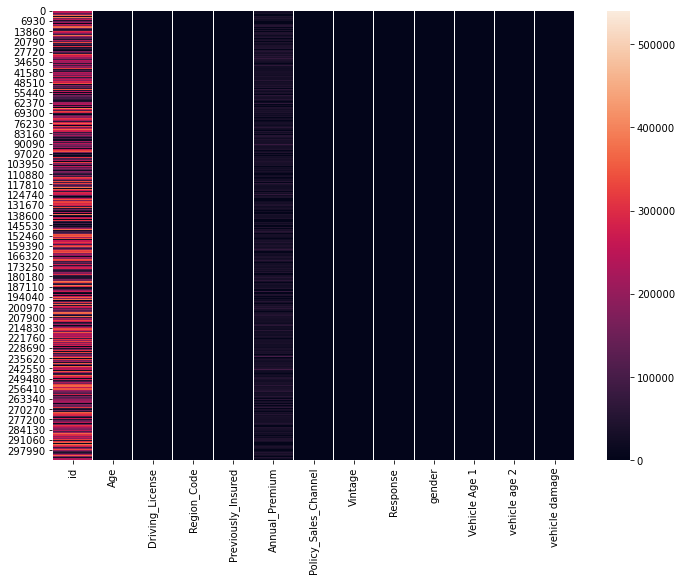

In [22]:
## Create Heatmap of coorelation
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(insurance_F,ax=ax)

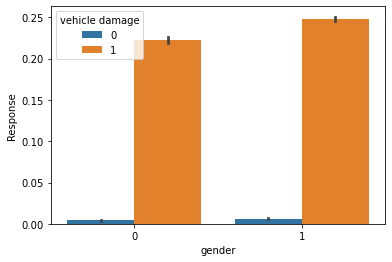

In [23]:
## Vehical damage vs respne
# using Seaborn
sns.barplot(x= 'gender' , y= 'Response', hue = 'vehicle damage' , data = insurance_F )

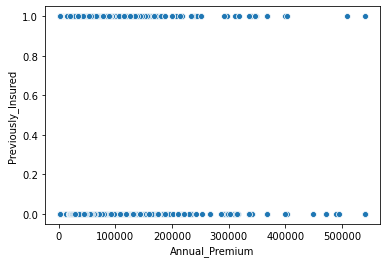

In [24]:
## realtionship between previously insured vs annual premium

sns.scatterplot( x = 'Annual_Premium', y = 'Previously_Insured', data =insurance_F )


In [25]:
## Create logistic regression
## split data set for logistic regression
train,test=train_test_split(insurance_F,test_size=0.2,random_state=5)
x_train=train.drop('Response',axis=1)
y_train=train['Response']
x_test=test.drop('Response',axis=1)
y_test=test['Response']

In [26]:
## Perform logistic regression
### Model fitting : Finding optimum coefficients of model equation using Least square method, consider all variables
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [27]:
## coeeficient and intercept of mode
print(logreg.coef_)
print(logreg.intercept_)

[[-1.41571811e-06 -1.08546985e-03 -5.52254617e-05 -1.38689990e-03
  -1.74766622e-04 -8.54858794e-06 -9.98364670e-03 -1.84842106e-03
  -9.89762795e-06 -1.02221683e-04  1.70277332e-05  1.28678775e-04]]
[-5.58954337e-05]


In [28]:
## make prediction using model fro test dataset
y_pred = logreg.predict(x_test)

In [29]:
## display confusion matrix
confusion_matrix(y_test,y_pred)

array([[53548,     0],
       [ 7430,     0]], dtype=int64)

In [30]:
print(accuracy_score(y_test,y_pred))

0.8781527764111647


In [31]:
pd.crosstab(y_test,y_pred)

col_0,0
Response,
0,53548
1,7430


In [32]:
## probability of having class as yes response
logreg.predict_proba(x_test)[:,1]

array([0.22420841, 0.26687378, 0.06711909, ..., 0.22062656, 0.08559618,
       0.06262943])

In [33]:
## prediction at thresolt = 0.65
y_predict65 = np.where(logreg.predict_proba(x_test)[:,1 ]>0.65,1,0)
y_predict55 = np.where(logreg.predict_proba(x_test)[:,1 ]>0.55,1,0)
y_predict60 = np.where(logreg.predict_proba(x_test)[:,1 ]>0.60,1,0)

In [34]:
## confusion matrix at threshold 0.55,0.60,0.65
print(pd.crosstab(y_test,y_predict55))
print(accuracy_score(y_test,y_predict55))

col_0         0
Response       
0         53548
1          7430
0.8781527764111647


In [35]:
print(pd.crosstab(y_test,y_predict60))
print(accuracy_score(y_test,y_predict60))

col_0         0
Response       
0         53548
1          7430
0.8781527764111647


### F- Score of Model

In [36]:
## F! score of Model
Insurancee_F1_Score = f1_score(y_test , y_predict60, average='macro')
print(Insurancee_F1_Score)
Insurancee_F1_Score1 = f1_score(y_test , y_predict60, average='micro')
print(Insurancee_F1_Score1)
Insurancee_F1_Score2 = f1_score(y_test, y_pred, average='weighted')
print(Insurancee_F1_Score2)


0.46756195099802667
0.8781527764111647
0.8211816508262761


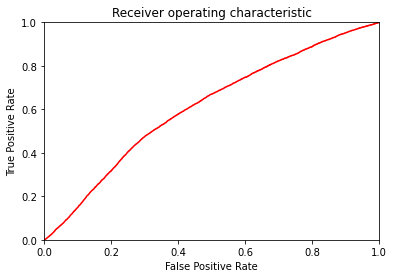

In [37]:
## ROC CURVE and AUC score
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1 ])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, color = 'red')
plt.show()
           

In [38]:
print(pd.crosstab(y_test,y_predict65))
print(accuracy_score(y_test,y_predict65))

col_0         0
Response       
0         53548
1          7430
0.8781527764111647


### load test data

In [39]:
insurance_test = pd.read_csv(r"C:\Users\Administrator\Desktop\TEST.csv")

In [40]:
insurance_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,291378,Male,31,1,18,0,1-2 Year,Yes,2630,156,152
1,154746,Female,24,1,15,1,< 1 Year,No,28105,152,267
2,218512,Female,25,1,14,1,< 1 Year,No,29302,152,139
3,173930,Male,49,1,28,0,1-2 Year,Yes,28357,26,12
4,241471,Male,55,1,45,0,1-2 Year,Yes,33288,26,44


In [41]:
## checn NA value
insurance.isna()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
304882,False,False,False,False,False,False,False,False,False,False,False,False
304883,False,False,False,False,False,False,False,False,False,False,False,False
304884,False,False,False,False,False,False,False,False,False,False,False,False
304885,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
## count NA value
insurance_test.isnull().sum().sum()

0

In [43]:
type(insurance_test)

pandas.core.frame.DataFrame

In [44]:
insurance_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,291378,Male,31,1,18,0,1-2 Year,Yes,2630,156,152
1,154746,Female,24,1,15,1,< 1 Year,No,28105,152,267
2,218512,Female,25,1,14,1,< 1 Year,No,29302,152,139
3,173930,Male,49,1,28,0,1-2 Year,Yes,28357,26,12
4,241471,Male,55,1,45,0,1-2 Year,Yes,33288,26,44


In [45]:
## create dummy variable
Gender_dummy = pd.get_dummies(insurance_test['Gender'],drop_first = True)
Vehicle_Age_dummy = pd.get_dummies(insurance_test['Vehicle_Age'],drop_first = True)
Vehicle_Damage_dummy = pd.get_dummies(insurance_test['Vehicle_Damage'],drop_first = True)

In [46]:
## add dummy variable woth dataframe
insurance_test_F = pd.concat([insurance_test,Gender_dummy,Vehicle_Age_dummy,Vehicle_Damage_dummy],axis = 1)

In [47]:
insurance_test_F.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Male,< 1 Year,> 2 Years,Yes
0,291378,Male,31,1,18,0,1-2 Year,Yes,2630,156,152,1,0,0,1
1,154746,Female,24,1,15,1,< 1 Year,No,28105,152,267,0,1,0,0
2,218512,Female,25,1,14,1,< 1 Year,No,29302,152,139,0,1,0,0
3,173930,Male,49,1,28,0,1-2 Year,Yes,28357,26,12,1,0,0,1
4,241471,Male,55,1,45,0,1-2 Year,Yes,33288,26,44,1,0,0,1


In [48]:
## Rename dummy variable column
insurace_test_F = insurance_test_F.rename(columns = {"Male": "gender", 
                     "< 1 Year":"Vehicle Age 1","> 2 Years": "vehicle age 2","Yes": "vehicle damage"}, 
                                 inplace = True) 

In [49]:
insurance_test_F.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,gender,Vehicle Age 1,vehicle age 2,vehicle damage
0,291378,Male,31,1,18,0,1-2 Year,Yes,2630,156,152,1,0,0,1
1,154746,Female,24,1,15,1,< 1 Year,No,28105,152,267,0,1,0,0
2,218512,Female,25,1,14,1,< 1 Year,No,29302,152,139,0,1,0,0
3,173930,Male,49,1,28,0,1-2 Year,Yes,28357,26,12,1,0,0,1
4,241471,Male,55,1,45,0,1-2 Year,Yes,33288,26,44,1,0,0,1


In [50]:
print(logreg.coef_)
print(logreg.intercept_)

[[-1.41571811e-06 -1.08546985e-03 -5.52254617e-05 -1.38689990e-03
  -1.74766622e-04 -8.54858794e-06 -9.98364670e-03 -1.84842106e-03
  -9.89762795e-06 -1.02221683e-04  1.70277332e-05  1.28678775e-04]]
[-5.58954337e-05]


In [51]:
insurance_test_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76222 entries, 0 to 76221
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    76222 non-null  int64 
 1   Gender                76222 non-null  object
 2   Age                   76222 non-null  int64 
 3   Driving_License       76222 non-null  int64 
 4   Region_Code           76222 non-null  int64 
 5   Previously_Insured    76222 non-null  int64 
 6   Vehicle_Age           76222 non-null  object
 7   Vehicle_Damage        76222 non-null  object
 8   Annual_Premium        76222 non-null  int64 
 9   Policy_Sales_Channel  76222 non-null  int64 
 10  Vintage               76222 non-null  int64 
 11  gender                76222 non-null  uint8 
 12  Vehicle Age 1         76222 non-null  uint8 
 13  vehicle age 2         76222 non-null  uint8 
 14  vehicle damage        76222 non-null  uint8 
dtypes: int64(8), object(3), uint8(4)
mem

In [52]:
insurance_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   id                    304887 non-null  int64
 1   Age                   304887 non-null  int64
 2   Driving_License       304887 non-null  int64
 3   Region_Code           304887 non-null  int64
 4   Previously_Insured    304887 non-null  int64
 5   Annual_Premium        304887 non-null  int64
 6   Policy_Sales_Channel  304887 non-null  int64
 7   Vintage               304887 non-null  int64
 8   Response              304887 non-null  int64
 9   gender                304887 non-null  uint8
 10  Vehicle Age 1         304887 non-null  uint8
 11  vehicle age 2         304887 non-null  uint8
 12  vehicle damage        304887 non-null  uint8
dtypes: int64(9), uint8(4)
memory usage: 22.1 MB


In [53]:
##  drop categorical variable
insurance_test_F = insurance_test_F.drop(['Gender','Vehicle_Age','Vehicle_Damage'],axis = 1)

In [54]:
insurance_test_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76222 entries, 0 to 76221
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   id                    76222 non-null  int64
 1   Age                   76222 non-null  int64
 2   Driving_License       76222 non-null  int64
 3   Region_Code           76222 non-null  int64
 4   Previously_Insured    76222 non-null  int64
 5   Annual_Premium        76222 non-null  int64
 6   Policy_Sales_Channel  76222 non-null  int64
 7   Vintage               76222 non-null  int64
 8   gender                76222 non-null  uint8
 9   Vehicle Age 1         76222 non-null  uint8
 10  vehicle age 2         76222 non-null  uint8
 11  vehicle damage        76222 non-null  uint8
dtypes: int64(8), uint8(4)
memory usage: 4.9 MB


In [55]:
## make prediction using model fro test dataset
Y_predtest = logreg.predict(insurance_test_F)

In [56]:
type(Y_predtest)

numpy.ndarray

In [60]:
Response = pd.DataFrame(Y_predtest,columns= ['Response'])

In [61]:
Response.head()

,Response
0,0
1,0
2,0
3,0
4,0


In [59]:
type(Response)

pandas.core.frame.DataFrame

In [64]:
output = pd.concat([insurance_test_F,Response],axis = 1)

In [65]:
output.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,gender,Vehicle Age 1,vehicle age 2,vehicle damage,Response
0,291378,31,1,18,0,2630,156,152,1,0,0,1,0
1,154746,24,1,15,1,28105,152,267,0,1,0,0,0
2,218512,25,1,14,1,29302,152,139,0,1,0,0,0
3,173930,49,1,28,0,28357,26,12,1,0,0,1,0
4,241471,55,1,45,0,33288,26,44,1,0,0,1,0


In [69]:
output = output[['id', 'Response']]

In [70]:
output.head()

,id,Response
0,291378,0
1,154746,0
2,218512,0
3,173930,0
4,241471,0


In [72]:
## export CSV file
output.to_csv(r"C:\Users\Administrator\Desktop\output.csv")
